# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import os 
print(os.getcwd())

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

file_list = glob.glob('/Users/jonathanmaat/data_science/Census Data/states*.csv')
#print(type(files))


df_list = []

# loop through list of files and read each one into a dataframe and append to list
for file in file_list:
    # read in csv
    temp_df = pd.read_csv(file)
    # append df to list
    df_list.append(temp_df)



# concatenate our list of dataframes into one!
us_census = pd.concat(df_list, axis=0)
#print(us_census.shape)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
# drop unamed 0
# TotalPop to numeric
# remove percentages and $ signs for all data types and convert to numeric
# GenderPop need to be split by _ and by M/F Population into two new columns


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
us_census['Income'] = us_census['Income'].replace('\$','',regex=True)
us_census['Income'] = us_census['Income'].replace('\,','',regex=True)
us_census['Income'] = pd.to_numeric(us_census.Income)
print(us_census['Income'].head())
print(us_census.dtypes)

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
Name: Income, dtype: float64
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
dtype: object


In [6]:
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop  
0  3.25%   0.04%  59125.27      510388M_543273F  
1  1.25%   0.05%  46296.81    2322409M_2455167F  
2  1.02%   0.04%  51805.41      423477M_419713F  
3  1.41%   0.04%  47328.08    3167756M_3331859F  
4  3.67%   0.07%  55874.52  13171316M_13367298F  


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [7]:
us_census['Men'] = us_census['GenderPop'].str.split('_').str.get(0)
us_census['Women'] = us_census['GenderPop'].str.split('_').str.get(1)
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop        Men      Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388M    543273F  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409M   2455167F  
2  1.02%   0.04%  51805.41      423477M_419713F    423477M    419713F  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756M   3331859F  
4  3.67%   0.07%  55874.52  13171316M_13367298F  13171316M  13367298F  


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [8]:
us_census['Men'] = us_census['Men'].str[:-1]
us_census['Women'] = us_census['Women'].str[:-1]

In [9]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

In [10]:
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

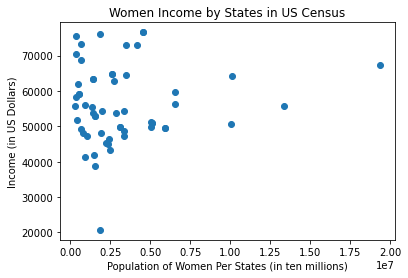

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Population of Women Per States (in ten millions)')
plt.ylabel('Income (in US Dollars)')
plt.title('Women Income by States in US Census')
plt.show()
plt.clf()

In [12]:
print(us_census.head())

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop       Men       Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388    543273.0  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409   2455167.0  
2  1.02%   0.04%  51805.41      423477M_419713F    423477    419713.0  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756   3331859.0  
4  3.67%   0.07%  55874.52  13171316M_13367298F  13171316  13367298.0  


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [13]:
#print(us_census.Women)

# checked if data types to 'TotalPop' and 'Men' are both numerics
#print(us_census.dtypes)


# us_census = us_census.fillna({'Women':us_census['TotalPop']-us_census['Men']})
# print(us_census['Women'])

# cleaner version of the above commented out code:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop']-us_census['Men'])
print(us_census.head())



   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop       Men       Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388    543273.0  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409   2455167.0  
2  1.02%   0.04%  51805.41      423477M_419713F    423477    419713.0  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756   3331859.0  
4  3.67%   0.07%  55874.52  13171316M_13367298F  13171316  13367298.0  


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [14]:
duplicated_df = us_census.duplicated()
print(len(duplicated_df))

60


11. Drop those duplicates using the `.drop_duplicates()` function.

In [15]:
us_census = us_census.drop_duplicates()

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

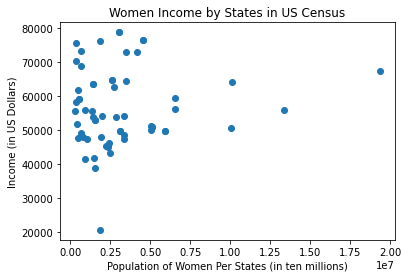

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Population of Women Per States (in ten millions)')
plt.ylabel('Income (in US Dollars)')
plt.title('Women Income by States in US Census')
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [17]:
print(us_census.columns)
print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific    Income            GenderPop       Men       Women  
0  3.25%   0.04%  59125.27      510388M_543273F    510388    543273.0  
1  1.25%   0.05%  46296.81    2322409M_2455167F   2322409   2455167.0  
2  1.02%   0.04%  51805.41      423477M_419713F    423477    419713.0  
3  1.41%   0.04%  47328.08    3167756M_3331859F   3167756   3331859.0  
4  3.67%   0.07%  

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [18]:
print(us_census.dtypes)

column_name_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for column_name in column_name_list:
    us_census[column_name] = us_census[column_name].str.replace('\%','',regex=True)
print(us_census.head())

for column_name in column_name_list:
    us_census[column_name] = pd.to_numeric(us_census[column_name])

print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object
   Unnamed: 0           State  TotalPop Hispanic  White  Black Native Asian  \
0           0    Rhode Island   1053661    13.36  74.33   5.68   0.35  3.25   
1           1  South Carolina   4777576     5.06  62.89  28.75   0.29  1.25   
2           2    South Dakota    843190     3.24  82.50   1.42   9.42  1.02   
3           3       Tennessee   6499615     4.72  73.49  18.28   0.23  1.41   
4           4           Texas  26538614    38.05  44.69  11.65   0.26  3.67   

  Pacific    Income            GenderPop       Men       Women  
0    0.04  59125.27      510388M_543273F    510388    543273.0  
1    0.05  46296.81    2322409M_2455167F   2322409   2455167.0  
2    0.04  51805.41      42347

False    60
dtype: int64
60


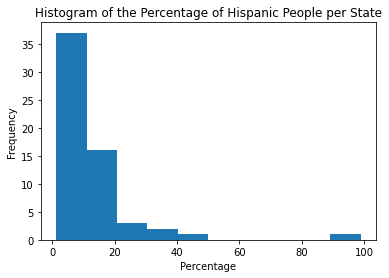

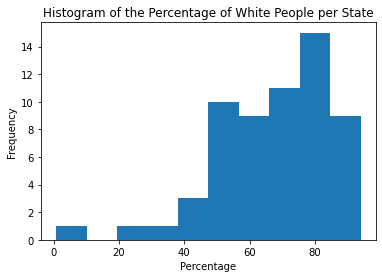

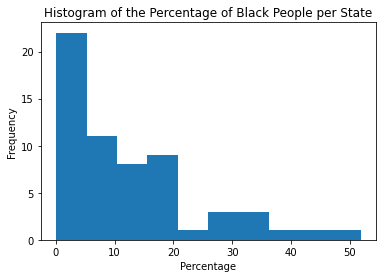

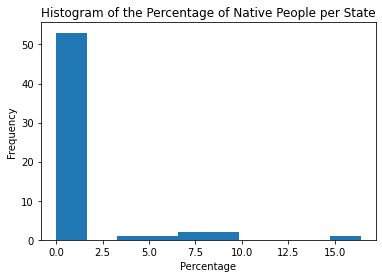

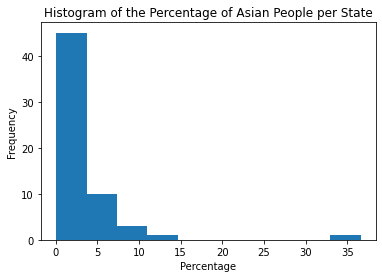

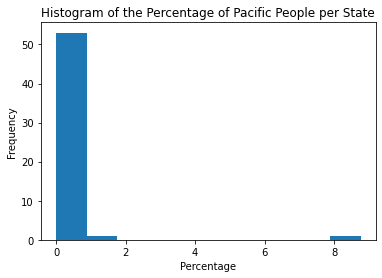

<Figure size 432x288 with 0 Axes>

In [22]:
print(us_census.duplicated().value_counts())
print(len(us_census))

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()